# Try to use Sentiment analysis to predict stock price
- retrieve stock price
- sentiment analysis - retrieve text and converting it into a numeric value to represent the feeling of the text

## install / import packages

In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
## Example pulling microsoft stock
msft = yf.Ticker("MSFT")

In [ ]:
hist = msft.history(period="max")

In [ ]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054277,0.062259,0.054277,0.059598,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059598,0.062791,0.059598,0.061726,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.061726,0.063323,0.061726,0.062791,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.062791,0.063323,0.060662,0.061194,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061194,0.061726,0.059598,0.060130,47894400,0.0,0.0


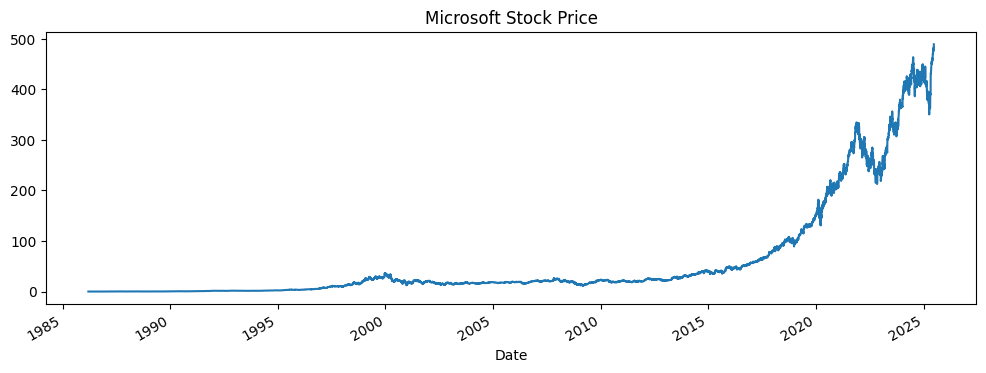

In [ ]:
hist.Open.plot(figsize=(12,4), title="Microsoft Stock Price")
plt.show()

In [ ]:
# pull more stocks (3 years of history)
stocks = [
    "^GSPC",
    "ETSY",
    "PINS",
    "TSLA",
    "SHOP",
    "O",
    "MELI",
    "ISRG",
    "DIS",
    "BRK-B",
    "AMZN",
    "ZM",
    "PFE",
    "CLX",
    "DPZ",
    "RTX",
]

In [ ]:
hists = {}
for stock in stocks:
    hists[stock] = yf.Ticker(stock).history(period="3y")

In [ ]:
# plot the stock price with plotly
for stock in stocks:
  temp_df = hists[stock].copy()

  fig = go.Figure(
      data=[go.Candlestick(
          x=temp_df.index,
          open=temp_df["Open"],
          high=temp_df["High"],
          low=temp_df["Low"],
          close=temp_df["Close"]
      )]
  )
  fig.update_layout(title=stock, xaxis_rangeslider_visible=False)
  fig.show()

## pull Tweets about each stock

In [ ]:
# try CLX fisrt
hists["CLX"].index.min()

Timestamp('2022-06-27 00:00:00-0400', tz='America/New_York')

In [ ]:
stock = "CLX"

In [ ]:
! pip install snscrape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
# import libraries
import tweepy
import os
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter

# scrape data from tweeter
tweets_list = []

for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2022-06-27 until:2025-06-24"
        ).get_items()),
    total=1000):
    if i > 1000:
      break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


tweets_df = pd.DataFrame(tweets_list, columns=["date", "id", "content", "username"])

  0%|          | 0/1000 [00:00<?, ?it/s]

ERROR:snscrape.base:Error retrieving https://twitter.com/search?f=live&lang=en&q=%24CLX+since%3A2022-06-27+until%3A2025-06-24&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=%24CLX+since%3A2022-06-27+until%3A2025-06-24&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1016)')))"))
CRITICAL:snscrape.base:4 requests to https://twitter.com/search?f=live&lang=en&q=%24CLX+since%3A2022-06-27+until%3A2025-06-24&src=spelling_expansion_revert_click failed, giving up.
CRITICAL:snscrape.base:Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=%24CLX+since%3A2022-06-27+until%3A2025-06-24&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerif

ScraperException: 4 requests to https://twitter.com/search?f=live&lang=en&q=%24CLX+since%3A2022-06-27+until%3A2025-06-24&src=spelling_expansion_revert_click failed, giving up.

In [ ]:
## since snscrape doesn't work anymore, try using 'tweepy' library. Note that you’ll need X API credentials (API Key, API Secret, Access Token, and Access Token Secret) to use this script.

In [ ]:
import tweepy
import pandas as pd
from datetime import datetime
import os

# Replace these with your own X API credentials
API_KEY = "7xcxm004fsnWToVBd4ej5D5cz"
API_SECRET = "wh1wLvROvzQ9iGw0TGbutiaBIiNH09jLsrhkGJGc1tRc5JB1j3"
ACCESS_TOKEN = "254562826-9YQT8qvsQdSn8Bb4OXZhN17Rymg06gvb7qtg2DGW"
ACCESS_TOKEN_SECRET = "XEDutvVqTxWnzJeWiIIRBf2r444MpqlHzsEUJVqrjFHHn"

# Authenticate with X API
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Define the search query and date range
search_query = "$CLX -filter:retweets"  # Search for $CLX, exclude retweets
since_date = "2022-06-25"
until_date = "2025-06-25"  # Current date as of request

# Function to convert date to X API format (YYYYMMDDHHMM)
def format_date_for_api(date_str):
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    return date_obj.strftime("%Y%m%d%H%M")

# Initialize a list to store tweet data
tweets_data = []

# Search for tweets
try:
    for tweet in tweepy.Cursor(api.search_tweets,
                             q=search_query,
                             since_id=None,
                             until=format_date_for_api(until_date),
                             lang="en").items(1000):  # Limit to 1000 tweets for this example
        tweet_date = tweet.created_at
        if tweet_date >= datetime.strptime(since_date, "%Y-%m-%d"):
            tweets_data.append({
                "created_at": tweet.created_at,
                "username": tweet.user.screen_name,
                "text": tweet.text,
                "retweet_count": tweet.retweet_count,
                "favorite_count": tweet.favorite_count
            })

    # Create a DataFrame
    df = pd.DataFrame(tweets_data)

    # Save to CSV
    output_file = "clx_threads_2022_06_25_to_2025_06_25.csv"
    df.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}")

except tweepy.TweepyException as e:
    print(f"Error occurred: {e}")

Error occurred: 403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product


# it looks X free account doens't have access to retrieving posts. Have to change to other approaches
-let's try using yahoo finance headlines

In [ ]:
# install necessary packages
!pip install transformers feedparser requests

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=ac60aebe77573fd4ae3e28240c5ce24efcb0f11a72455803f6ddd3270911de15
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [ ]:
import feedparser
import requests
from transformers import pipeline

In [ ]:
# use <finbert> model
pipe = pipeline("text-classification", model="ProsusAI/finbert")

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
print(pipe("stocks rallied and the british pound gained."))

[{'label': 'positive', 'score': 0.898361325263977}]


In [ ]:
ticker = "META"
keyword = 'meta'

rss_url = f"https://finance.yahoo.com/rss/headline?s={ticker}"
feed = feedparser.parse(rss_url)

total_score = 0
num_articles = 0

for i, entry in enumerate(feed.entries):
    if keyword.lower() not in entry.title.lower():
        continue
    else:
        print(f'Title: {entry.title}')
        print(f'Link: {entry.link}')
        print(f'Published: {entry.published}')
        print(f'Summary: {entry.summary}')

        sentiment = pipe(entry.summary)[0]

        print(f'Sentiment: {sentiment["label"]}, Score: {sentiment["score"]}')
        print('-' * 50)

        if sentiment['label'] == 'positive':
            total_score += sentiment['score']
            num_articles += 1
        elif sentiment['label'] == 'negative':
            total_score -= sentiment['score']
            num_articles += 1
final_score = total_score / num_articles if num_articles > 0 else 0
print(f'Overall sentiment:{"Positive" if final_score >= 0.15 else "Negative" if final_score <=-0.15 else "Neutral"} {final_score}')

Title: ‘People Are Very Fixated on This Notion of AI is Going to Replace People's Jobs’ Says Mark Zuckerberg, But He Thinks That’s Wrong
Link: https://www.barchart.com/story/news/33042153/people-are-very-fixated-on-this-notion-of-ai-is-going-to-replace-people-s-jobs-says-mark-zuckerberg-but-he-thinks-thats-wrong?.tsrc=rss
Published: Wed, 25 Jun 2025 11:56:29 +0000
Summary: Mark Zuckerberg sees artificial intelligence as a tool for empowerment rather than replacement, emphasizing AI’s potential to enhance productivity and reshape how companies are built.
Sentiment: positive, Score: 0.695485532283783
--------------------------------------------------
Title: 9 Under-the-Radar Tech Stocks With Incredible Growth Potential
Link: https://www.fool.com/investing/2025/06/25/under-radar-tech-stocks-incredible-growth-stock/?.tsrc=rss
Published: Wed, 25 Jun 2025 09:10:00 +0000
Summary: Investors can find many tech stocks that have massive growth potential, but don't get as much attention.  If you'r

In [ ]:
keyword = 'tesla'
date = '2025-06-24' # free version only allow to access ONE month old
API_KEY = '71e85c59c5ec44a798757332a7a20ca2'

url = (
    'https://newsapi.org/v2/everything?'
    f'q={keyword}&'
    f'from={date}&'
    'sortBy=popularity&'
    f'apiKey={API_KEY}'
)
response = requests.get(url)
articles = response.json()["articles"]
articles = [article for article in articles if keyword.lower() in article["title"].lower() or keyword.lower() in article["description"].lower()]

total_score = 0
num_articles = 0

for i, article in enumerate(articles):
        print(f'Title: {article["title"]}')
        print(f'Link: {article["url"]}')
        print(f'Description: {article["description"]}')

        sentiment = pipe(article['content'])[0]

        print(f'Sentiment: {sentiment["label"]}, Score: {sentiment["score"]}')
        print('-' * 50)

        if sentiment['label'] == 'positive':
            total_score += sentiment['score']
            num_articles += 1
        elif sentiment['label'] == 'negative':
            total_score -= sentiment['score']
            num_articles += 1
final_score = total_score / num_articles if num_articles > 0 else 0
print(f'Overall sentiment:{"Positive" if final_score >= 0.15 else "Negative" if final_score <=-0.15 else "Neutral"} {final_score}')

Title: Tesla’s robotaxi reality check
Link: https://www.theverge.com/the-vergecast/691888/tesla-robotaxi-mvno-mobile-vergecast
Description: After years of grand promises about how robotaxis would change the way we buy and use our cars, Tesla finally launched its taxi service. In one small portion of one city. With only a few cars and a few riders. Plus safety monitors in the passenger seat. Cauti…
Sentiment: neutral, Score: 0.9281811714172363
--------------------------------------------------
Title: Tesla no ha lanzado solo un robotaxi. Ha lanzado un mensaje: no necesita a nadie más
Link: https://www.xataka.com/movilidad/tesla-no-ha-lanzado-solo-robotaxi-ha-lanzado-mensaje-no-necesita-a-nadie
Description: Elon Musk sacaba pecho el domingo. Y con razón. Sus robotaxis al fin comenzaban a funcionar, y él lo celebraba con un mensaje en X en el que felicitaba al equipo encargado del lanzamiento. La razón es lógica, porque esos ingenieros no han logrado solo que los…
Sentiment: neutral, Scor